In [382]:
# Let's import the libraries we need
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
%matplotlib inline

#### Step 1 : Sorting countries per use of fertilizer 

In [180]:
#opening database and visualization
fertilizer=pd.read_csv('./data/Emissions_Agriculture_Synthetic_Fertilizers_E_All_Data_(Normalized).zip',sep=',',encoding='latin-1')
fertilizer.head()

,Area Code,Area,Item Code,Item,Element Code,Element,Year Code,Year,Unit,Value,Flag,Note
0,2,Afghanistan,1360,Nitrogenous fertilizers,5163,Agricultural Use,1961,1961,kg,1000000.0,E,NaN
1,2,Afghanistan,1360,Nitrogenous fertilizers,5163,Agricultural Use,1962,1962,kg,1000000.0,E,NaN
2,2,Afghanistan,1360,Nitrogenous fertilizers,5163,Agricultural Use,1963,1963,kg,1000000.0,E,NaN
3,2,Afghanistan,1360,Nitrogenous fertilizers,5163,Agricultural Use,1964,1964,kg,1000000.0,E,NaN
4,2,Afghanistan,1360,Nitrogenous fertilizers,5163,Agricultural Use,1965,1965,kg,1000000.0,E,NaN


In [181]:
#Determining countries most fertilizer consumer for the last year of using
(fertilizer.query('`Element Code` == (5163, 5162)')
    .query('`Year Code` == 2017')
    .query('`Area Code` <300')
    .sort_values('Value', ascending=False)
).head()

,Area Code,Area,Item Code,Item,Element Code,Element,Year Code,Year,Unit,Value,Flag,Note
23958,41,"China, mainland",3102,Nutrient nitrogen N (total),5162,Agricultural Use in nutrients,2017,2017,kg of nutrients,2.961900e+10,Fm,NaN
54169,100,India,3102,Nutrient nitrogen N (total),5162,Agricultural Use in nutrients,2017,2017,kg of nutrients,1.695930e+10,P,NaN
117124,231,United States of America,3102,Nutrient nitrogen N (total),5162,Agricultural Use in nutrients,2017,2017,kg of nutrients,1.164932e+10,Qm,NaN
13949,21,Brazil,3102,Nutrient nitrogen N (total),5162,Agricultural Use in nutrients,2017,2017,kg of nutrients,5.172707e+09,Fb,NaN
85907,165,Pakistan,3102,Nutrient nitrogen N (total),5162,Agricultural Use in nutrients,2017,2017,kg of nutrients,3.446922e+09,Qm,NaN


In [182]:
# As the previous sorting is not fully representative (we have a quantity of nutrient and not a quantity per surface)
#We will rather use another dataset :
fertilizer_area=pd.read_csv('./data/Environment_Fertilizers_E_All_Data_(Normalized).zip',sep=',',encoding='latin-1')
fertilizer_area.head(1)

,Area Code,Area,Item Code,Item,Element Code,Element,Year Code,Year,Unit,Value,Flag
0,2,Afghanistan,3102,Nutrient nitrogen N (total),5159,Use per area of cropland,2002,2002,kg/ha,3.02,Fc


In [183]:
#Sorting as previously (but the last year is 2016 and not 2017)
(fertilizer_area.query('`Item Code` == (3102)')
    .query('`Year Code` == 2016')
    .query('`Area Code` <300')
    .sort_values('Value', ascending=False)
).head(20)

,Area Code,Area,Item Code,Item,Element Code,Element,Year Code,Year,Unit,Value,Flag
2030,59,Egypt,3102,Nutrient nitrogen N (total),5159,Use per area of cropland,2016,2016,kg/ha,366.87,Fc
4328,150,Netherlands,3102,Nutrient nitrogen N (total),5159,Use per area of cropland,2016,2016,kg/ha,244.89,Fc
1366,41,"China, mainland",3102,Nutrient nitrogen N (total),5159,Use per area of cropland,2016,2016,kg/ha,225.81,Fc
3609,256,Luxembourg,3102,Nutrient nitrogen N (total),5159,Use per area of cropland,2016,2016,kg/ha,216.58,Fc
595,255,Belgium,3102,Nutrient nitrogen N (total),5159,Use per area of cropland,2016,2016,kg/ha,216.36,Fc
3871,134,Malta,3102,Nutrient nitrogen N (total),5159,Use per area of cropland,2016,2016,kg/ha,204.47,Fc
6390,225,United Arab Emirates,3102,Nutrient nitrogen N (total),5159,Use per area of cropland,2016,2016,kg/ha,180.74,Fc
1538,48,Costa Rica,3102,Nutrient nitrogen N (total),5159,Use per area of cropland,2016,2016,kg/ha,176.84,Fc
6435,229,United Kingdom,3102,Nutrient nitrogen N (total),5159,Use per area of cropland,2016,2016,kg/ha,171.26,Fc
5777,207,Suriname,3102,Nutrient nitrogen N (total),5159,Use per area of cropland,2016,2016,kg/ha,171.21,Fc


We could maybe improve it by making the average on all year

#### Step 2 : Studying crops production for most fertilizer user countries
Visualising for maybe the 3 first countries, what are the most produced crops.
We would like finding a country where one crop could be representative of most of fertilizer use


In [184]:
# We will need crop dataset to get the area harvested for each crop (as we have pesticive for an area of cropland)
crop=pd.read_csv('./data/Production_Crops_E_All_Data_(Normalized).zip',sep=',',encoding='latin-1')
crop.head(1)

,Area Code,Area,Item Code,Item,Element Code,Element,Year Code,Year,Unit,Value,Flag
0,2,Afghanistan,221,"Almonds, with shell",5312,Area harvested,1975,1975,ha,0.0,F


In [14]:
# crop production for egypt (could be a function)
x=59
egypt_crop=(crop.query('`Area Code` == %d'%(x))
    .query('`Year Code` == 2017')
    .query('`Item Code` <1000')# to avoid getting value of aggregated crop (ex:cereal ...)
    .query('`Element Code` == 5312')
    .sort_values('Value', ascending=False)
)
egypt_crop.head(1)

,Area Code,Area,Item Code,Item,Element Code,Element,Year Code,Year,Unit,Value,Flag
527103,59,Egypt,15,Wheat,5312,Area harvested,2017,2017,ha,1342805.0,Im


In [15]:
area_tot=egypt_crop.Value.sum()
print(area_tot)

5485623.0


In [16]:
# Getting a new column with the part of each area harvested on the total one
egypt_crop=egypt_crop.assign(Part= lambda df : df.Value/area_tot)
egypt_crop.head(1)

,Area Code,Area,Item Code,Item,Element Code,Element,Year Code,Year,Unit,Value,Flag,Part
527103,59,Egypt,15,Wheat,5312,Area harvested,2017,2017,ha,1342805.0,Im,0.244786


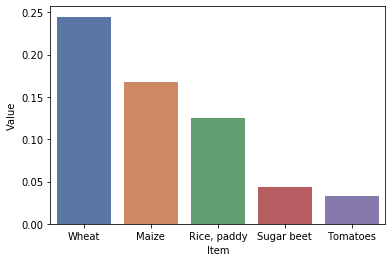

In [17]:
sns.barplot(x=egypt_crop.Item.head(5), y=egypt_crop.Value.head(5)/area_tot, palette="deep")

In [18]:
# creating a function which plot 5 main crops of a country
def main_crop_plot(x):
    '''x is the country code'''
    country_crop=(crop.query('`Area Code` == %d'%(x))
        .query('`Year Code` == 2017')
        .query('`Item Code` <1000')# to avoid getting value of aggregated crop (ex:cereal ...)
        .query('`Element Code` == 5312')
        .sort_values('Value', ascending=False)
    )
    area_tot=country_crop.Value.sum()
    return (country_crop.Item.head(5),country_crop.Value.head(5)/area_tot)
    

    

In [19]:
sns.barplot(x=country_crop.Item.head(5), y=country_crop.Value.head(5)/area_tot, palette="deep")

NameError: name 'country_crop' is not defined

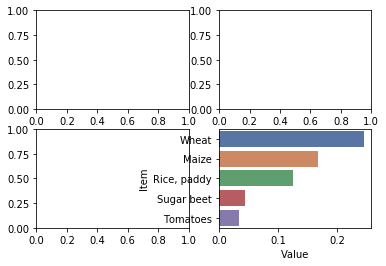

In [20]:
fig, axs = plt.subplots(2, 2)
p=[]
p.append(main_crop_plot(59))
sns.barplot(x=p[0][1], y=p[0][0], palette="deep")


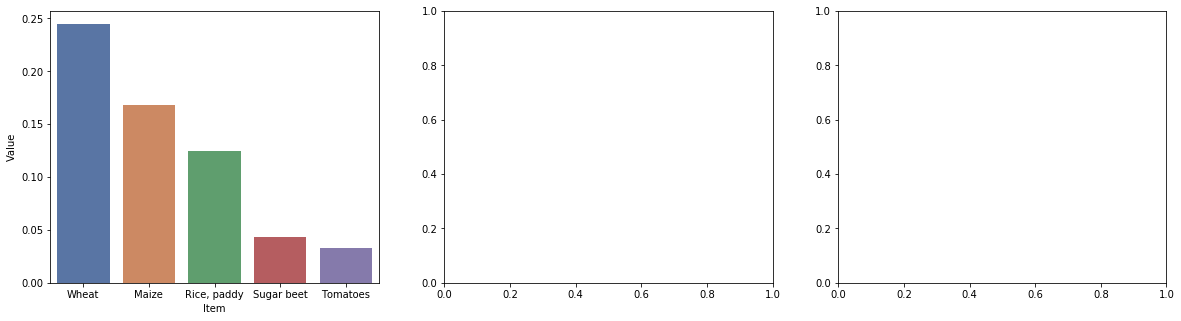

In [21]:
fig = plt.figure(figsize = (20, 5))
ax1 = fig.add_subplot(1,3,1)
ax2 = fig.add_subplot(1,3,2)
ax3 = fig.add_subplot(1,3,3)

p=[]
p.append(main_crop_plot(59))
sns.barplot(x=p[0][0], y=p[0][1], palette="deep",ax=ax1)

In [22]:
#netherland plot
main_crop_plot(150)

(1118878       Potatoes
 1120716          Wheat
 1119948     Sugar beet
 1117749    Onions, dry
 1113525         Barley
 Name: Item, dtype: object, 1118878    0.301363
 1120716    0.217406
 1119948    0.159962
 1117749    0.064392
 1113525    0.055738
 Name: Value, dtype: float64)

In [23]:
main_crop_plot(41)

(333886                    Maize
 338859              Rice, paddy
 343644                    Wheat
 343013    Vegetables, fresh nes
 340265                 Soybeans
 Name: Item, dtype: object, 333886    0.228039
 338859    0.165370
 343644    0.131814
 343013    0.057186
 340265    0.039488
 Name: Value, dtype: float64)

In [24]:
main_crop_plot(256)

(957266        Wheat
 955585       Barley
 957107    Triticale
 956844     Rapeseed
 956413         Oats
 Name: Item, dtype: object, 957266    0.414851
 955585    0.192846
 957107    0.132191
 956844    0.095546
 956413    0.038283
 Name: Value, dtype: float64)

In [25]:
fertilizer.head(5)

,Area Code,Area,Item Code,Item,Element Code,Element,Year Code,Year,Unit,Value,Flag,Note
0,2,Afghanistan,1360,Nitrogenous fertilizers,5163,Agricultural Use,1961,1961,kg,1000000.0,E,NaN
1,2,Afghanistan,1360,Nitrogenous fertilizers,5163,Agricultural Use,1962,1962,kg,1000000.0,E,NaN
2,2,Afghanistan,1360,Nitrogenous fertilizers,5163,Agricultural Use,1963,1963,kg,1000000.0,E,NaN
3,2,Afghanistan,1360,Nitrogenous fertilizers,5163,Agricultural Use,1964,1964,kg,1000000.0,E,NaN
4,2,Afghanistan,1360,Nitrogenous fertilizers,5163,Agricultural Use,1965,1965,kg,1000000.0,E,NaN


In [476]:
#opening database and visualization
crops=pd.read_csv('./data/Production_Crops_E_All_Data_(Normalized).zip',sep=',',encoding='latin-1')
crops.head(5)

,Area Code,Area,Item Code,Item,Element Code,Element,Year Code,Year,Unit,Value,Flag
0,2,Afghanistan,221,"Almonds, with shell",5312,Area harvested,1975,1975,ha,0.0,F
1,2,Afghanistan,221,"Almonds, with shell",5312,Area harvested,1976,1976,ha,5900.0,F
2,2,Afghanistan,221,"Almonds, with shell",5312,Area harvested,1977,1977,ha,6000.0,F
3,2,Afghanistan,221,"Almonds, with shell",5312,Area harvested,1978,1978,ha,6000.0,F
4,2,Afghanistan,221,"Almonds, with shell",5312,Area harvested,1979,1979,ha,6000.0,F


In [477]:
yield_for_pca=(crops.query('`Element Code` == 5419')
        .query('`Year Code` == 2016')
        .query('`Item Code` <1000')
        .pivot(index='Area',columns='Item',values='Value')
        .fillna(value=0)
        .reset_index()
          )
yield_for_pca.head()

Item,Area,Agave fibres nes,"Almonds, with shell","Anise, badian, fennel, coriander",Apples,Apricots,Areca nuts,Artichokes,Asparagus,Avocados,...,Tung nuts,Vanilla,"Vegetables, fresh nes","Vegetables, leguminous nes",Vetches,"Walnuts, with shell",Watermelons,Wheat,Yams,Yautia (cocoyam)
0,Afghanistan,0.0,16859.0,6923.0,72762.0,20819.0,0.0,0.0,0.0,0.0,...,0.0,0.0,90558.0,0.0,0.0,16498.0,115473.0,19803.0,0.0,0.0
1,Africa,0.0,5984.0,9201.0,152821.0,70530.0,0.0,157061.0,79196.0,78506.0,...,8435.0,472.0,73677.0,98953.0,19525.0,29086.0,227828.0,24526.0,87519.0,0.0
2,Albania,0.0,0.0,0.0,240028.0,159325.0,0.0,0.0,0.0,0.0,...,0.0,0.0,130879.0,49674.0,3309.0,0.0,448276.0,39000.0,0.0,0.0
3,Algeria,0.0,13223.0,0.0,108716.0,67149.0,0.0,188489.0,0.0,0.0,...,0.0,0.0,194467.0,84318.0,4932.0,0.0,318040.0,11833.0,0.0,0.0
4,American Samoa,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,36430.0,0.0,0.0,0.0,0.0,0.0,35852.0,0.0


In [478]:
%run PCA_processing

pca,yield_pca=PCA_processing(yield_for_pca,'Area', yield_for_pca.columns[1:])

<Figure size 432x288 with 0 Axes>

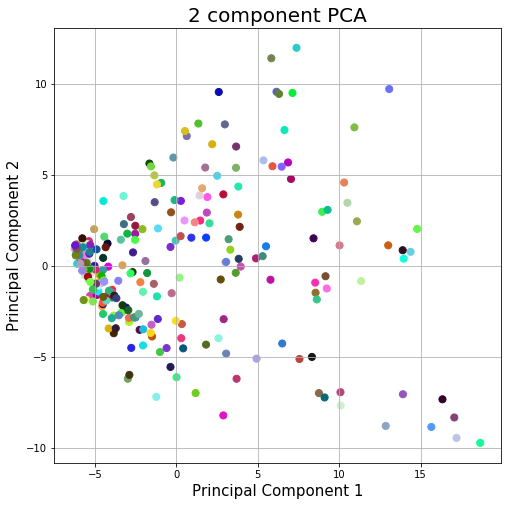

In [479]:
%run PCA_viz

PCA_viz(yield_pca)

In [480]:
pca.explained_variance_ratio_

array([0.21264605, 0.09051399])

In [481]:
grouped_yield_for_pca=(crops.query('`Element Code` == 5419')
        .query('`Year Code` == 2016')
        .query('`Item Code` >1000')
        .pivot(index='Area',columns='Item',values='Value')
        .fillna(value=0)
        .reset_index()
          )
grouped_yield_for_pca.head()

Item,Area,Cereals (Rice Milled Eqv),"Cereals,Total","Citrus Fruit,Total","Coarse Grain, Total",Fruit Primary,"Pulses,Total","Roots and Tubers,Total","Treenuts,Total",Vegetables Primary
0,Afghanistan,19391.0,19816.0,83127.0,16667.0,88201.0,7406.0,119868.0,15984.0,91869.0
1,Africa,14245.0,15261.0,108260.0,13007.0,88514.0,7629.0,85875.0,5437.0,83707.0
2,Albania,47164.0,47164.0,271093.0,54585.0,225650.0,13178.0,245894.0,48487.0,272656.0
3,Algeria,10204.0,10204.0,181242.0,7647.0,105776.0,9978.0,304431.0,13223.0,219122.0
4,American Samoa,0.0,0.0,0.0,0.0,41581.0,0.0,38299.0,0.0,37544.0


In [482]:
%run PCA_processing

pca,grouped_yield_pca=PCA_processing(grouped_yield_for_pca,'Area', grouped_yield_for_pca.columns[1:])

<Figure size 432x288 with 0 Axes>

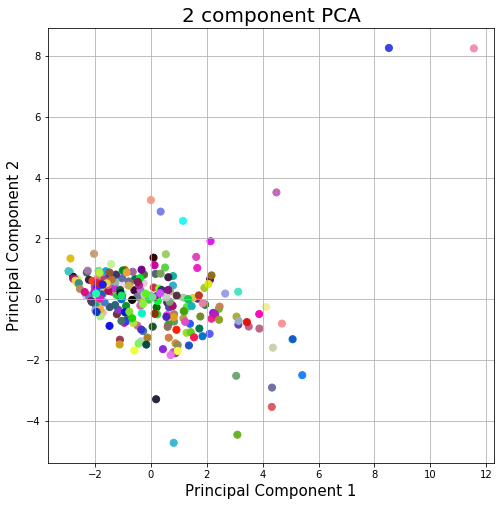

In [483]:
%run PCA_viz

PCA_viz(grouped_yield_pca)

In [484]:
pca.explained_variance_ratio_

array([0.43640583, 0.17494791])

In [485]:
def ferti_class(x): #associate a color to each bin of fertilizer
    if x<50 :
        return 'g'
    elif 50<=x<150:
        return 'b'
    else:
        return 'r'

In [486]:
fertilizer_area_2016=(fertilizer_area.query('`Item Code` == (3102)')
    .query('`Year Code` == 2016')
    .query('`Area Code` <300')
    .sort_values('Value', ascending=False)
)

In [487]:
grouped_yield_pca=pd.merge(grouped_yield_pca,fertilizer_area_2016.loc[:,['Area','Value']],left_on='Area',right_on='Area')
grouped_yield_pca['ferti_class']=grouped_yield_pca.Value.apply(ferti_class)

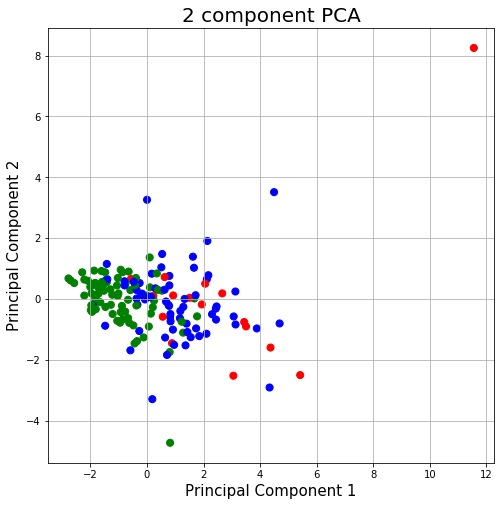

In [488]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)

areas = grouped_yield_pca.Area
    
ax.scatter(grouped_yield_pca.loc[:, 'PC1']
               , grouped_yield_pca.loc[:, 'PC2']
               , c = grouped_yield_pca.loc[:, 'ferti_class']
               , s = 50)
#ax.legend(areas)
ax.grid()

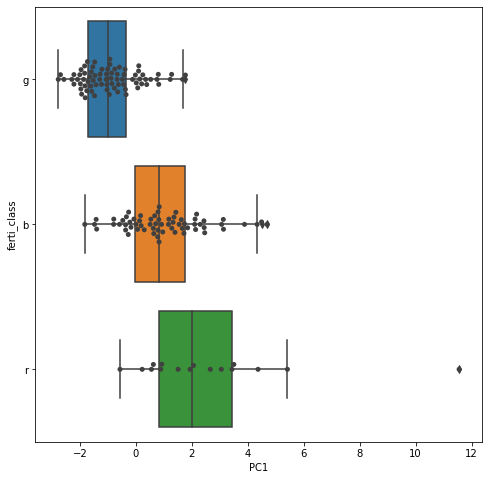

In [500]:
fig = plt.figure(figsize = (8,8))
ax = sns.boxplot(x='PC1', y='ferti_class', data=grouped_yield_pca)
ax = sns.swarmplot(x='PC1', y='ferti_class', data=grouped_yield_pca, color=".25")

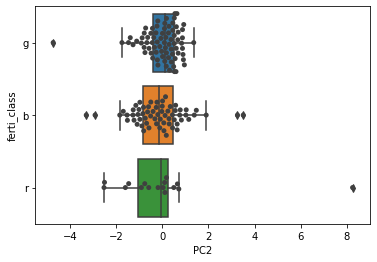

In [475]:
ax = sns.boxplot(x='PC2', y='ferti_class', data=grouped_yield_pca)
ax = sns.swarmplot(x='PC2', y='ferti_class', data=grouped_yield_pca, color=".25")